<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/Data_GooglePlayStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("sample_data/googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# df = df[df.notnull()]
df['Size'].str.isalnum().value_counts()
# df['Size'].str.isdigit().value_counts()

True     5536
False    5305
Name: Size, dtype: int64

In [ ]:
df['Rating'].isna().value_counts()
# not_nan = df['Rating'].isnull() == False
rating = df['Rating'].loc[df['Rating'].isnull() == False]
rating_mean = rating.mean()
df['Rating'] = df['Rating'].fillna(rating_mean)

In [ ]:
df['Rating'].isna().value_counts()

False    10841
Name: Rating, dtype: int64

## Clean rating

In [ ]:
# Rating
df['Rating'].isnull().value_counts()
# not_nan = df['Rating'].isnull() == False
# df['Rating'].loc[not_nan]

rating = df['Rating'].loc[df['Rating'].isnull() == False]
rating_mean = rating.mean()
df['Rating'] = df['Rating'].fillna(rating_mean)
df['Rating'].head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [ ]:
df['Rating'].isnull().value_counts()

False    10841
Name: Rating, dtype: int64

## Clean Install

In [ ]:
# df['Installs'].isnull().value_counts()
df['Installs'].str.isnumeric().value_counts()

False    10840
True         1
Name: Installs, dtype: int64

In [ ]:
def to_int(data):
  try:
    if data.isnumeric():
      return int(data)
    else:
      x = data.replace(",", "")
      x = x.replace("+", "")
      return int(x)
  except:
    return 0

# not_numeric = df['Installs'].str.isnumeric() == False
# df['Installs'].loc[not_numeric]

df['Installs'] = df['Installs'].apply(to_int)

## Clean Size

In [ ]:
df['Size'].str.isnumeric().value_counts()

False    10841
Name: Size, dtype: int64

In [ ]:
def to_float(data):
  try:
    if data.isnumeric():
      return float(data)
    else:
      x = data.replace("M", "")
      x = x.replace(".", "")
      return float(x)
  except:
    return 0

# not_numeric = df['Installs'].str.isnumeric() == False
# df['Installs'].loc[not_numeric]

df['Size'] = df['Size'].apply(to_float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  int64  
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


## Clean Price


In [ ]:
df['Rating'].isnull().value_counts()

True     10040
False      801
Name: Price, dtype: int64

In [ ]:
not_numeric = df['Price'].str.isnumeric() == False
df['Price'].loc[not_numeric]

234       $4.99
235       $4.99
290       $4.99
291       $4.99
427       $3.99
          ...  
10735     $0.99
10760     $7.99
10782    $16.99
10785     $1.20
10798     $1.04
Name: Price, Length: 801, dtype: object

In [ ]:
def to_float(data):
  try:
    if data.isnumeric():
      return float(data)
    else:
      x = data.replace("$", "")
      x = x.replace(".", "")
      return float(x)
  except:
    return 0

df['Price'] = df['Price'].apply(to_float)
df[df['Price'] > 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.700000,11442,68.0,100000,Paid,499.0,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.800000,10295,39.0,100000,Paid,499.0,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.700000,11442,68.0,100000,Paid,499.0,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.800000,10295,39.0,100000,Paid,499.0,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.000000,18247,0.0,100000,Paid,399.0,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.193338,17,0.0,100,Paid,99.0,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.400000,35,24.0,1000,Paid,799.0,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.800000,252,11.0,10000,Paid,1699.0,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.200000,1405,95.0,10000,Paid,120.0,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [ ]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10841, dtype: int64

## Insight 1

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


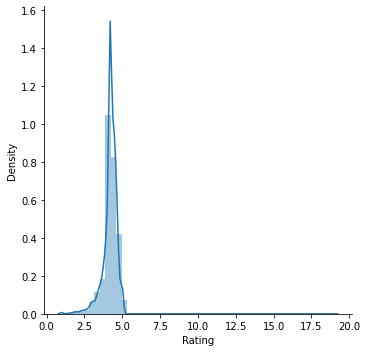

In [ ]:
sns.FacetGrid(df, size=5).map(sns.distplot, "Rating").add_legend()

In [ ]:
# Normalisasi installs 

df[df['Size'] > 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,87.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,28.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.193338,0,96.0,10,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,36.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,95.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


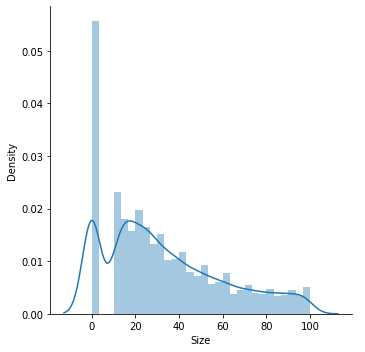

In [ ]:
sns.FacetGrid(df, size=5).map(sns.distplot, "Size").add_legend()

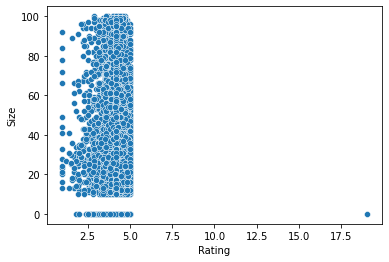

In [ ]:
sns.scatterplot(data=df, x="Rating", y="Size")
plt.show()

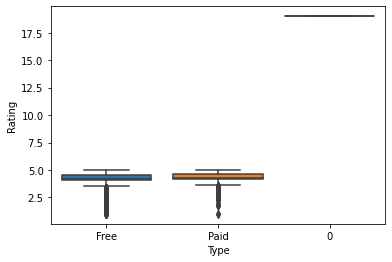

In [ ]:
sns.boxplot(x="Type", y="Rating", data=df)
plt.show()

## Clean Category



In [ ]:
# Category
df['Category'].isna().count()